In [1]:
from pathlib import Path
import typing as T
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy
import xarray as xr
import iris
import iris.plot
import numpy as np
import os
import textwrap

In [2]:
home_dir=os.environ['HOME']
HOME=Path(home_dir)

In [3]:
rose='u-cy368'
ANCILLARY_DIR= HOME / 'cylc-run' / rose / 'share/data/ancils/aus2200'

In [4]:
ERA_DIR = ANCILLARY_DIR / 'era5/'
D0198_DIR = ANCILLARY_DIR / 'd0198/'

In [5]:
# We need to import ants to read in UM file formats
import ants

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/esmf.py:26: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/ants/regrid/_ugrid.py:19: UserWarning:  No module named 'ESMF'
Proceeding without capabilities provided by ESMPy (ESMF).
  warnings.warn(msg.format(str(_ESMF_IMPORT_ERROR)))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/iris/experimental/raster.py:29: IrisDeprecation: iris.experimental.raster is deprecated since version 3.2, and will be removed in a future release. If you make use of this functionality, please contact the Iris Developers to discuss how to retain it (which may involve reversing the deprecation).
  warn_deprecated(wmsg)


In [6]:
# Plot the land sea mask and fractions files
MASK_FILE_ERA = ERA_DIR / 'qrparm.mask'
MASK_FILE_D0198 = D0198_DIR / 'qrparm.mask'

In [7]:
mask_cube_era = ants.load(MASK_FILE_ERA)
mask_cube_d0198 = ants.load(MASK_FILE_D0198)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


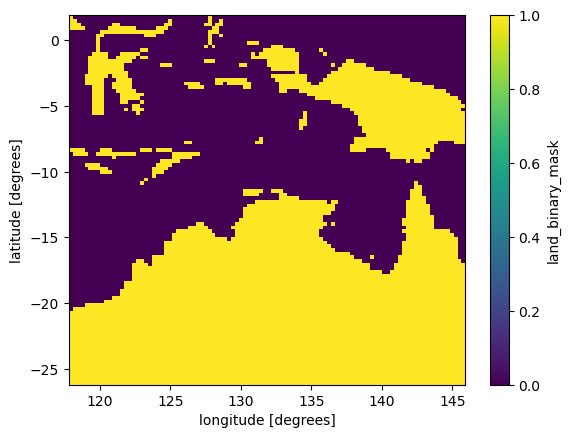

In [8]:
lbm_era = xr.DataArray.from_iris(mask_cube_era[1])
land_mask = lbm_era
land_mask.plot()

In [9]:
ERA_OROG_FILE = ERA_DIR / 'qrparm.orog'

In [10]:
era_orog = ants.load(ERA_OROG_FILE)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [11]:
da = xr.DataArray.from_iris(era_orog[0])

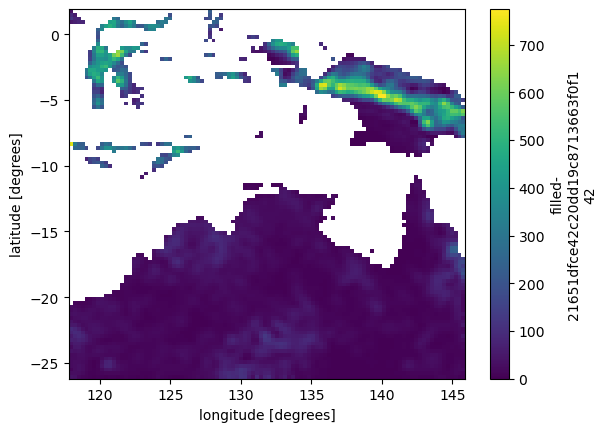

In [12]:
da.where(land_mask).plot()

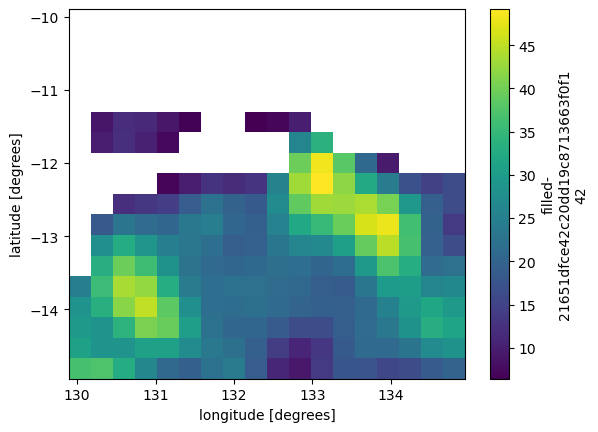

In [13]:
da.where(land_mask).sel(latitude=slice(-15,-10),longitude=slice(130,135)).plot()

In [20]:
chunk = da.sel(latitude=slice(-15,-10),longitude=slice(130,135))
mask = land_mask.sel(latitude=slice(-15,-10),longitude=slice(130,135))

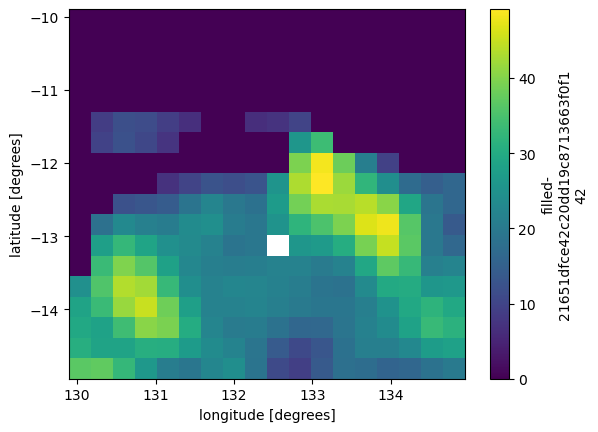

In [21]:
chunk[6,9]=np.nan
chunk.plot()

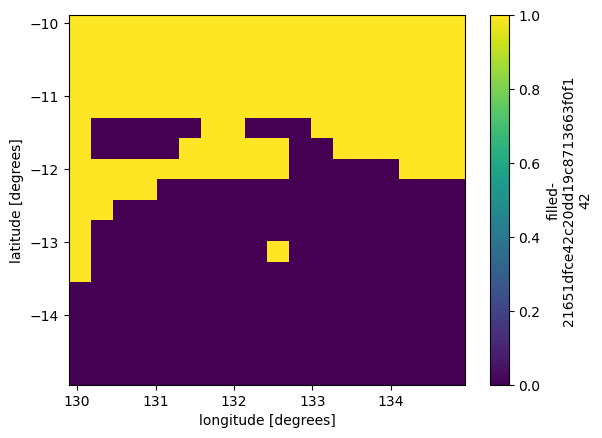

In [22]:
chunk.where(mask).isnull().plot()

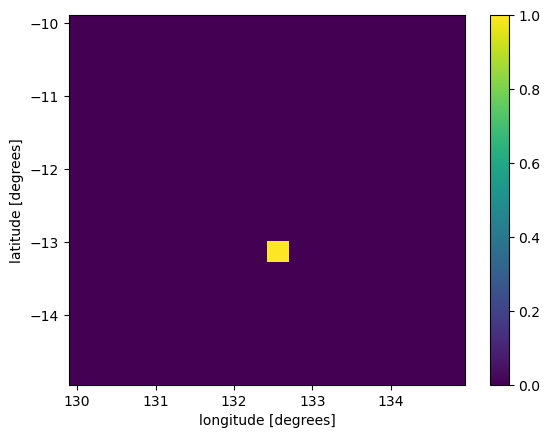

In [26]:
all_mask = mask & chunk.isnull()
all_mask.plot()

In [52]:
mask.values

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
chunk.isnull().values

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False],

In [50]:
all_mask.compute().sum() > 0

<xarray.DataArray ()> Size: 1B
array(True)

In [71]:
# Now try for a grid already has a lsm
ERA_VEG_FILE = ERA_DIR / 'qrparm.soil'

In [72]:
era_veg = ants.load(ERA_VEG_FILE)

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.04/lib/python3.10/site-packages/mule/stashmaster.py:284: UserWarning: Ancillary files do not define the UM version number in the Fixed Length Header. No STASHmaster file loaded: Fields will not have STASH entries attached.
  warnings.warn(msg)


In [73]:
da = xr.DataArray.from_iris(era_veg[0])

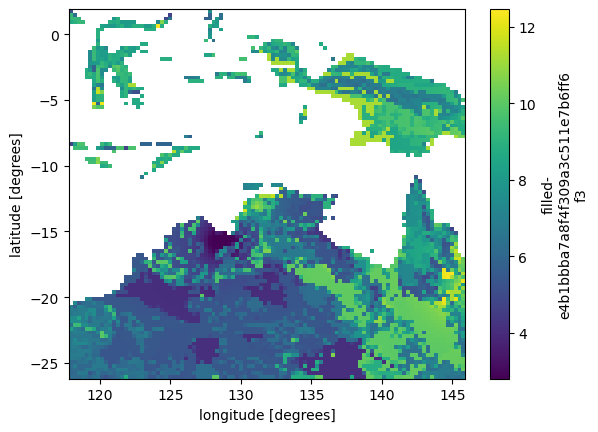

In [76]:
da.plot()

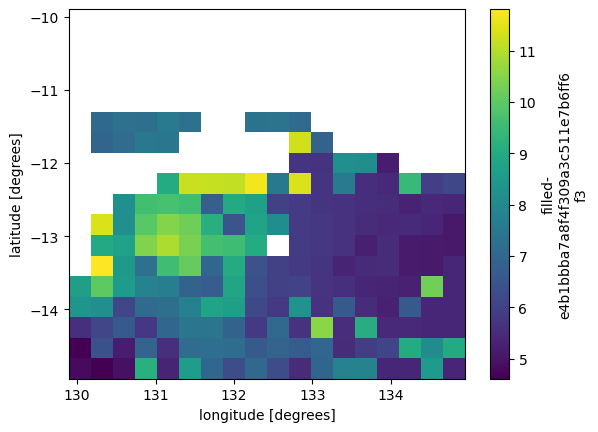

In [77]:
chunk = da.sel(latitude=slice(-15,-10),longitude=slice(130,135))
chunk[6,9]=np.nan
chunk.plot()

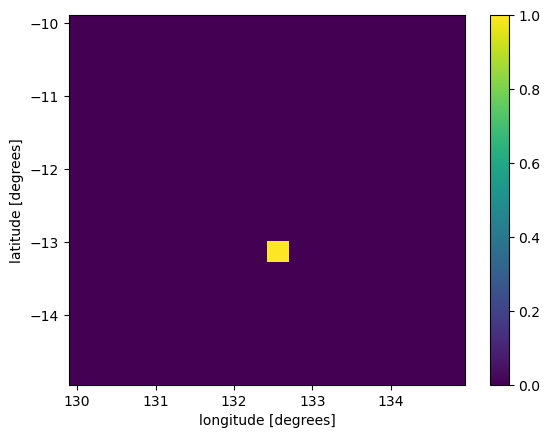

In [78]:
all_mask = mask & chunk.isnull()
all_mask.plot()

In [79]:
all_mask.compute().sum() > 0

<xarray.DataArray ()> Size: 1B
array(True)

In [ ]:
# Find location of NaN


In [80]:
chunk = da.sel(latitude=slice(-15,-10),longitude=slice(130,135))
all_mask = mask & chunk.isnull()
all_mask.compute().sum() > 0

<xarray.DataArray ()> Size: 1B
array(False)